In [11]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from keras.layers import LSTM
from math import sqrt

In [12]:
# 将数据转换成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # 输入序列(t-n, ... t-1)
    for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# 预测序列(t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# 把所有放在一起
	agg = concat(cols, axis=1)
	agg.columns = names
	# 删除空值行
	if dropnan:
		agg.dropna(inplace=True)
	return agg

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


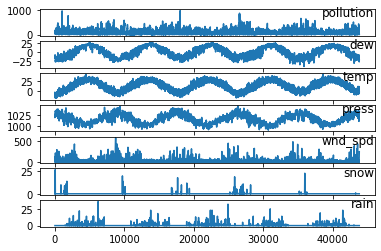

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv",index_col=0)
data.head()
data.to_csv("raw.csv")

# 加载数据
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
#删除No列
dataset.drop('No', axis=1, inplace=True)
# 修改剩余列名称
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# 将所有空值替换为0
dataset['pollution'].fillna(0, inplace=True)
# 删除前24小时行
dataset = dataset[24:]
# 打印前5行
print(dataset.head(5))
# 保存数据到pollution.csv
dataset.to_csv('pollution.csv')


#方便在浏览器中显示图标
%matplotlib inline
# 加载数据
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# 选择指定列绘图
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# 为每一列绘制图表
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [75]:
# 加载数据
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# # 对风向特征整数标签化
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # 确保所有数据是浮点数类型
# values = values.astype('float32')
# # 对特征标准化
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # 构建成监督学习问题
# reframed = series_to_supervised(scaled, 1, 1)
# # 删除我们不想预测的天气数据列，只留下pollution列
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())
dataset = read_csv('./data/jobs.csv', header=0, index_col=0)
dataset.drop("job_id", axis=1, inplace=True)
dataset.drop("task_id", axis=1, inplace=True)
values = dataset.values
# 确保所有数据是浮点数类型
values = values.astype('float32')
# 对特征标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(values)
# 构建成监督学习问题
reframed = series_to_supervised(scaled, 1, 1)
# reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed)
# 切分训练集和测试机
values = reframed.values
n_train_hours = 21000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
print(train.shape)
# 切分输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 将输入转换为三维格式 [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

[[1.31964462e+02 5.00000000e-01 8.93536583e-03 1.97000000e+02
  0.00000000e+00]
 [5.81428566e+01 5.00000000e-01 7.89480470e-03 7.70000000e+01
  0.00000000e+00]
 [1.09452675e+02 5.00000000e-01 8.99748877e-03 2.43000000e+02
  0.00000000e+00]
 ...
 [7.00000000e+00 5.00000000e-01 8.05529021e-03 2.00000000e+00
  0.00000000e+00]
 [3.90000000e+01 5.00000000e-01 5.73602878e-03 3.00000000e+00
  0.00000000e+00]
 [1.58333337e+00 5.00000000e-01 4.17259894e-03 6.81800000e+03
  0.00000000e+00]]
       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)  \
1       0.036100   0.038462   0.086372   0.005396        0.0  0.015751   
2       0.015751   0.038462   0.071832   0.002092        0.0  0.029895   
3       0.029895   0.038462   0.087240   0.006662        0.0  0.010218   
4       0.010218   0.038462   0.185185   0.000771        0.0  0.008163   
5       0.008163   0.038462   0.148148   0.000330        0.0  0.009889   
...          ...        ...        ...        ...        ...       ...

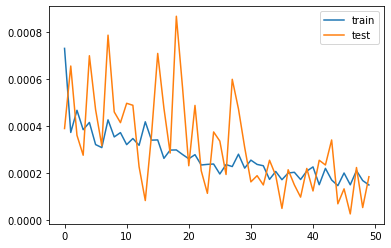

In [76]:
# 设计模型
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# 拟合模型
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# 绘制损失趋势线
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [77]:
# 开始预测
yhat = model.predict(test_X)
print(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print(yhat)

[[[7.3873391e-04 3.8461536e-02 4.1666664e-02 ... 3.8461536e-02
   7.4074082e-02 0.0000000e+00]]

 [[1.1025880e-03 3.8461536e-02 7.4074082e-02 ... 3.8461536e-02
   7.0457168e-02 0.0000000e+00]]

 [[7.1668224e-03 3.8461536e-02 7.0457168e-02 ... 3.8461536e-02
   1.8981481e-01 1.3489333e-03]]

 ...

 [[2.3154348e-02 3.8461536e-02 1.8981481e-01 ... 3.8461536e-02
   7.4074082e-02 2.7529250e-05]]

 [[1.6538820e-03 3.8461536e-02 7.4074082e-02 ... 3.8461536e-02
   4.1666664e-02 5.5058503e-05]]

 [[1.0474586e-02 3.8461536e-02 4.1666664e-02 ... 3.8461536e-02
   1.9820608e-02 1.8766691e-01]]]
[[ 0.00019324]
 [ 0.00019316]
 [ 0.00018658]
 ...
 [ 0.00018454]
 [ 0.0001952 ]
 [-0.00028038]]


In [78]:
print(yhat.shape)
# 预测值反转缩放
print(test_X)
print(test_X.shape)
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# print(inv_yhat)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# # 实际值反转缩放
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # 计算均方根误差
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

(10755, 1)
[[7.3873391e-04 3.8461536e-02 4.1666664e-02 ... 3.8461536e-02
  7.4074082e-02 0.0000000e+00]
 [1.1025880e-03 3.8461536e-02 7.4074082e-02 ... 3.8461536e-02
  7.0457168e-02 0.0000000e+00]
 [7.1668224e-03 3.8461536e-02 7.0457168e-02 ... 3.8461536e-02
  1.8981481e-01 1.3489333e-03]
 ...
 [2.3154348e-02 3.8461536e-02 1.8981481e-01 ... 3.8461536e-02
  7.4074082e-02 2.7529250e-05]
 [1.6538820e-03 3.8461536e-02 7.4074082e-02 ... 3.8461536e-02
  4.1666664e-02 5.5058503e-05]
 [1.0474586e-02 3.8461536e-02 4.1666664e-02 ... 3.8461536e-02
  1.9820608e-02 1.8766691e-01]]
(10755, 9)


In [79]:
inv_yhat = concatenate((yhat, test_X), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)

(10755, 10)


ValueError: operands could not be broadcast together with shapes (10755,10) (5,) (10755,10) 

In [70]:
print(inv_yhat)
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
print(inv_y)

[[3.3546002e+00 5.0000000e-01 5.7360288e-03 5.0000000e+01 0.0000000e+00]
 [5.7056704e+00 5.0000000e-01 8.0552902e-03 1.0000000e+00 0.0000000e+00]
 [2.0021395e+01 5.0000000e-01 7.7964431e-03 1.0000000e+00 0.0000000e+00]
 ...
 [5.5317074e+01 5.0000000e-01 1.6338363e-02 1.0000000e+00 0.0000000e+00]
 [6.9942331e+00 5.0000000e-01 8.0552902e-03 2.0000000e+00 0.0000000e+00]
 [2.7695522e+01 5.0000000e-01 5.7360288e-03 3.0000000e+00 0.0000000e+00]]
[[5.0000000e+00 5.0000000e-01 5.7360288e-03 5.0000000e+01 0.0000000e+00]
 [2.7000000e+01 5.0000000e-01 8.0552902e-03 1.0000000e+00 0.0000000e+00]
 [3.9400001e+00 5.0000000e-01 7.7964431e-03 1.0000000e+00 0.0000000e+00]
 ...
 [7.0000000e+00 5.0000000e-01 1.6338363e-02 1.0000000e+00 0.0000000e+00]
 [3.9000000e+01 5.0000000e-01 8.0552902e-03 2.0000000e+00 0.0000000e+00]
 [1.5833334e+00 5.0000000e-01 5.7360288e-03 3.0000000e+00 0.0000000e+00]]


In [80]:
def get_pred_data(y,z,sc):
    yy = concatenate((y,z), axis=1)
    y=sc.inverse_transform(yy)
    return y

In [84]:
y = get_pred_data(yhat, train_X[:, 5:], scaler)

ValueError: all the input arrays must have same number of dimensions